<a href="https://colab.research.google.com/github/samp3209/wineproject/blob/main/winemodeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code import and transformation


In [16]:
import pandas as pd

In [109]:
df = pd.read_csv('wine - df.csv')

In [110]:
df

,pp750ml,wine_names,year,price,region,country,quantity,ml,numbottles,new_names
0,10.30,"Red Wine Cabrita 2017, 75cl Regional Algarve",2017,10.30,algarve,port,750 ml,750,1,cabrita regional
1,17.99,"2017, QUINTA DO CONVENTO DO PARAISO ""EUPHORIA""...",2017,17.99,algarve,port,750 ml,750,1,quinta do convento do paraiso euphoria vinho ...
2,7.51,Adega do Cantor - Sociedade de Vitivinicultura...,2015,7.51,algarve,port,750 ml,750,1,adega do cantor sociedade de vitiviniculturada...
3,7.51,Adega do Cantor - Sociedade de Vitivinicultura...,2014,7.51,algarve,port,750 ml,750,1,adega do cantor sociedade de vitiviniculturada...
4,13.56,"Al-Ria Reserve Red 2019, Algarve, Portugal",2019,13.56,algarve,port,750 ml,750,1,alria white
...,...,...,...,...,...,...,...,...,...,...
9225,53.39,"Weingut Graf Neipperg, Schlossberg Spatburgund...",2017,53.39,wurrtenberg,germany,750 ml,750,1,weingut graf neipperg schlossberg riesling gg
9226,56.66,"Weingut Graf Neipperg, Schlossberg Spatburgund...",2016,56.66,wurrtenberg,germany,750 ml,750,1,weingut graf neipperg schlossberg riesling gg
9227,63.20,"Weingut Graf Neipperg, Schlossberg Spatburgund...",2014,63.20,wurrtenberg,germany,750 ml,750,1,weingut graf neipperg schlossberg riesling gg
9228,73.01,"Weingut Graf Neipperg, Schlossberg Spatburgund...",2011,73.01,wurrtenberg,germany,750 ml,750,1,weingut graf neipperg schlossberg riesling gg


In [111]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit the label encoder to the new_names column
label_encoder.fit(df['new_names'])

df['numbottles'] = df['numbottles'].replace('1/2', '.5', regex=True)

# Transform the new_names column using the label encoder
df['new_names_encoded'] = label_encoder.transform(df['new_names'])
new_names_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_)) #dictionary for label encoded column\
# one hot encode the region and country columns
region_dummies = pd.get_dummies(df['region'], prefix='region')
country_dummies = pd.get_dummies(df['country'], prefix='country')

# concatenate the original dataframe with the one hot encoded columns
df = pd.concat([df, region_dummies, country_dummies], axis=1)

# drop the original region and country columns
df = df.drop(['region', 'country', 'price', 'wine_names', 'new_names', 'quantity'], axis=1)



In [112]:
from sklearn.model_selection import train_test_split
import numpy as np 
y= df['pp750ml']
x = df.loc[:, ~df.columns.isin(['pp750ml'])]
X_train, X_test, y_train, y_test = train_test_split(x, y)

# Linear Regresssion is okay decision tree is okay

In [113]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Fit the model to your data
model.fit(X_train, y_train)

# Make predictions on new data
y_pred = model.predict(X_test)

In [114]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 6104097.941265315
Root Mean Squared Error: 2470.6472717215856
R-squared: 0.18781016216446278


In [115]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
model = DecisionTreeRegressor()

# Fit the model to your data
model.fit(X_train, y_train)

# Make predictions on new data
y_pred = model.predict(X_test)

In [116]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 5650540.436028482
Root Mean Squared Error: 2377.0865436555905
R-squared: 0.24815893116718202


# Random Forest is good

> Other code as well




In [121]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=200, max_depth=30, min_samples_split=2, min_samples_leaf=2)

# Fit the model to your data
model.fit(X_train, y_train)

# Make predictions on new data
y_pred = model.predict(X_test)

In [122]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 4478372.993223847
Root Mean Squared Error: 2116.2166697254434
R-squared: 0.40412341510045413


In [108]:
from sklearn.model_selection import cross_val_score

# Initialize the model
model = RandomForestRegressor(n_estimators=200, max_depth=30, min_samples_split=2, min_samples_leaf=2)

# Perform k-fold cross-validation
scores = cross_val_score(model, x, y, cv=5, scoring='r2')

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

Cross-validation scores: [-0.09523979 -0.07699227 -0.0572573  -0.0160766  -1.44357981]
Mean cross-validation score: -0.3378291528996119


In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the model
model = RandomForestRegressor()

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.5110788905013561


# SVR is bad


In [119]:
from sklearn.svm import SVR

# Initialize the model
model = SVR()

# Fit the model to your data
model.fit(X_train, y_train)

# Make predictions on new data
y_pred = model.predict(X_test)

In [120]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 7952242.175169601
Root Mean Squared Error: 2819.9720167352016
R-squared: -0.058097419934433514


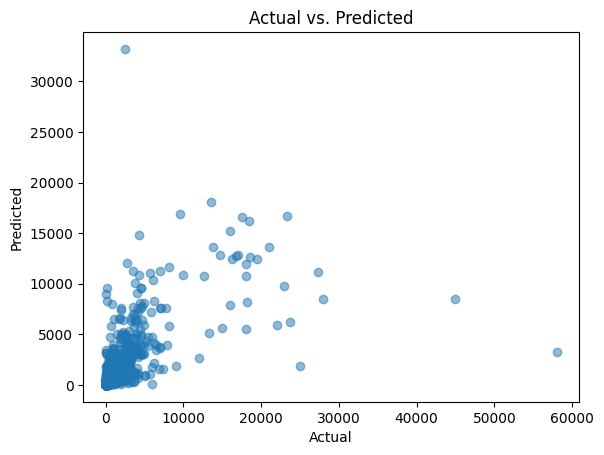

In [123]:
import matplotlib.pyplot as plt

# Create scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()